In [20]:
import os
import sys
import pandas as pd
import numpy as np
from pathlib import Path
import logging

# Setup paths
PROJECT_ROOT = os.path.dirname(os.path.dirname(os.getcwd()))
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

# Setup directories
MODEL_DIR = os.path.join(os.getcwd(), 'model')
RESULTS_DIR = os.path.join(os.getcwd(), 'results')
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

# Imports
from preprocessing.data_container import DataContainer
from utils.evaluation import cindex_score
from models.modelling_process import ModellingProcess
from sksurv.linear_model import CoxnetSurvivalAnalysis, CoxPHSurvivalAnalysis
from sklearn.pipeline import make_pipeline
import warnings
from sklearn.exceptions import FitFailedWarning
import matplotlib.pyplot as plt

# Setup logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

# Cox Model with imputed genes

In [12]:
# Data configuration
DATA_CONFIG = {
    'use_pca': False,
    'pca_threshold': 0.95,
    'gene_type': 'common_genes',
    'use_imputed': True,
    'use_cohorts': False, 
    'select_random' : False
}

In [13]:
mp = ModellingProcess()

In [14]:
mp.prepare_data(DATA_CONFIG, PROJECT_ROOT)

2024-11-30 00:11:14,392 - INFO - Loading data...
2024-11-30 00:14:41,591 - INFO - Loaded data: 1091 samples, 15495 features


In [15]:
# Model configuration
coxnet_pipe = make_pipeline(CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01, max_iter=100, n_alphas=10))
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FitFailedWarning)
coxnet_pipe.fit(mp.X, mp.y)

Pipeline(steps=[('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9,
                                        max_iter=100, n_alphas=10))])

In [16]:
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_

MODEL_CONFIG = {
    'params_cv': {
        'model__alphas' : [[v] for v in estimated_alphas], 
        'model__max_iter' : [10000], 
        'model__verbose' : [True], 
        
    },
    'refit': True, 
    'do_nested_resampling': True, 
    'path' : RESULTS_DIR, 
    'fname_cv' : 'results_imputed'}

In [17]:
cn_pipe = [('model', CoxnetSurvivalAnalysis())]

In [18]:
nstd_res_result = mp.do_modelling(cn_pipe, MODEL_CONFIG)

2024-11-30 00:15:29,349 - INFO - No additional monitoring detected
2024-11-30 00:15:29,350 - INFO - Start model training...
2024-11-30 00:15:29,350 - INFO - Input data shape: X=(1091, 15495)
2024-11-30 00:15:29,350 - INFO - Nested resampling...
2024-11-30 00:15:29,350 - INFO - Starting nested resampling...
2024-11-30 00:15:29,350 - INFO - Data shape: X=(1091, 15495), groups=9 unique
2024-11-30 00:15:29,365 - INFO - 
Outer fold 1
2024-11-30 00:15:29,468 - INFO - Test cohort: Atlanta_2014_Long


Fitting 8 folds for each of 10 candidates, totalling 80 fits


2024-11-30 00:49:57,251 - INFO - Best parameters: {'model__alphas': [np.float64(0.1447022118703326)], 'model__max_iter': 10000, 'model__verbose': True}
2024-11-30 00:49:57,252 - INFO - Test score: 0.693
2024-11-30 00:49:57,254 - INFO - 
Outer fold 2
2024-11-30 00:49:57,317 - INFO - Test cohort: Belfast_2018_Jain


Fitting 8 folds for each of 10 candidates, totalling 80 fits


2024-11-30 01:20:06,156 - INFO - Best parameters: {'model__alphas': [np.float64(0.1447022118703326)], 'model__max_iter': 10000, 'model__verbose': True}
2024-11-30 01:20:06,156 - INFO - Test score: 0.645
2024-11-30 01:20:06,157 - INFO - 
Outer fold 3
2024-11-30 01:20:06,218 - INFO - Test cohort: CPC_GENE_2017_Fraser


Fitting 8 folds for each of 10 candidates, totalling 80 fits


2024-11-30 01:55:44,823 - INFO - Best parameters: {'model__alphas': [np.float64(0.08674669700257892)], 'model__max_iter': 10000, 'model__verbose': True}
2024-11-30 01:55:44,824 - INFO - Test score: 0.680
2024-11-30 01:55:44,824 - INFO - 
Outer fold 4
2024-11-30 01:55:44,888 - INFO - Test cohort: CPGEA_2020_Li


Fitting 8 folds for each of 10 candidates, totalling 80 fits


2024-11-30 02:31:51,679 - INFO - Best parameters: {'model__alphas': [np.float64(0.1447022118703326)], 'model__max_iter': 10000, 'model__verbose': True}
2024-11-30 02:31:51,680 - INFO - Test score: 0.676
2024-11-30 02:31:51,680 - INFO - 
Outer fold 5
2024-11-30 02:31:51,733 - INFO - Test cohort: CamCap_2016_Ross_Adams


Fitting 8 folds for each of 10 candidates, totalling 80 fits


2024-11-30 03:07:36,385 - INFO - Best parameters: {'model__alphas': [np.float64(0.08674669700257892)], 'model__max_iter': 10000, 'model__verbose': True}
2024-11-30 03:07:36,386 - INFO - Test score: 0.754
2024-11-30 03:07:36,387 - INFO - 
Outer fold 6
2024-11-30 03:07:36,453 - INFO - Test cohort: CancerMap_2017_Luca


Fitting 8 folds for each of 10 candidates, totalling 80 fits


2024-11-30 03:41:07,883 - INFO - Best parameters: {'model__alphas': [np.float64(0.1447022118703326)], 'model__max_iter': 10000, 'model__verbose': True}
2024-11-30 03:41:07,884 - INFO - Test score: 0.714
2024-11-30 03:41:07,886 - INFO - 
Outer fold 7
2024-11-30 03:41:07,939 - INFO - Test cohort: DKFZ_2018_Gerhauser


Fitting 8 folds for each of 10 candidates, totalling 80 fits


2024-11-30 04:17:19,995 - INFO - Best parameters: {'model__alphas': [np.float64(0.08674669700257892)], 'model__max_iter': 10000, 'model__verbose': True}
2024-11-30 04:17:19,997 - INFO - Test score: 0.804
2024-11-30 04:17:19,998 - INFO - 
Outer fold 8
2024-11-30 04:17:20,090 - INFO - Test cohort: MSKCC_2010_Taylor


Fitting 8 folds for each of 10 candidates, totalling 80 fits


2024-11-30 04:51:54,983 - INFO - Best parameters: {'model__alphas': [np.float64(0.08674669700257892)], 'model__max_iter': 10000, 'model__verbose': True}
2024-11-30 04:51:54,984 - INFO - Test score: 0.739
2024-11-30 04:51:54,985 - INFO - 
Outer fold 9
2024-11-30 04:51:55,035 - INFO - Test cohort: Stockholm_2016_Ross_Adams


Fitting 8 folds for each of 10 candidates, totalling 80 fits


2024-11-30 08:31:54,452 - INFO - Best parameters: {'model__alphas': [np.float64(0.08674669700257892)], 'model__max_iter': 10000, 'model__verbose': True}
2024-11-30 08:31:54,452 - INFO - Test score: 0.710
2024-11-30 08:31:54,455 - INFO - Aggregated results:
2024-11-30 08:31:54,455 - INFO - Mean score: 0.713 ± 0.045
2024-11-30 08:31:54,455 - INFO - Individual scores: [np.float64(0.6927745664739884), np.float64(0.6452879581151832), np.float64(0.6798336798336798), np.float64(0.6756496631376323), np.float64(0.7537212449255751), np.float64(0.7136763529725406), np.float64(0.8036605657237936), np.float64(0.7387422360248447), np.float64(0.7100911238609517)]
2024-11-30 08:31:54,471 - WARNING - Won't save any model, since its not provided
2024-11-30 08:31:54,563 - INFO - Saved CV results to c:\Users\laeti\PCaPrognostics\models\pen_cox\results\results\results_imputed_cv.csv
2024-11-30 08:31:54,563 - WARNING - Won't save any pipe, since its not provided
2024-11-30 08:31:54,569 - INFO - Do HP Tuning

Fitting 9 folds for each of 10 candidates, totalling 90 fits


Number of non-zero coefficients: 74


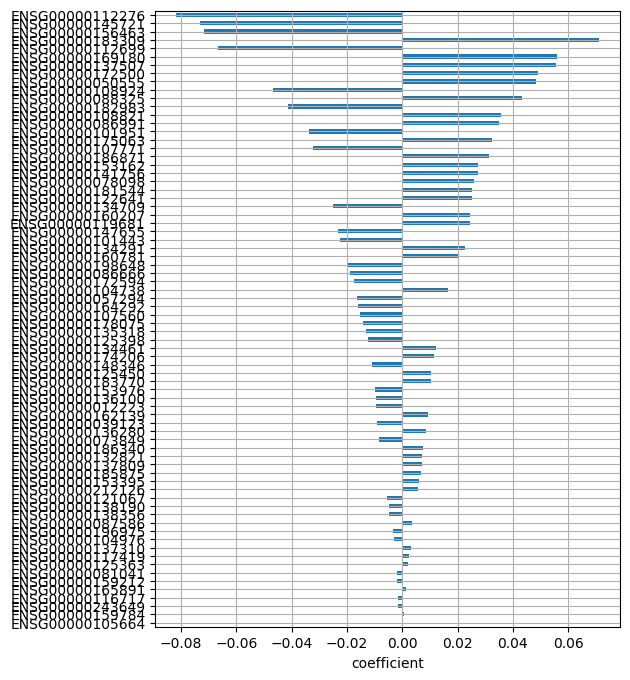

In [22]:
best_model = mp.resampling_cmplt.best_estimator_.named_steps["model"]
best_coefs = pd.DataFrame(best_model.coef_, index=mp.X.columns, columns=["coefficient"])

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print(f"Number of non-zero coefficients: {non_zero}")

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

# Cox Model with intersected genes

In [25]:
# Data configuration
DATA_CONFIG_inter = {
    'use_pca': False,
    'pca_threshold': 0.95,
    'gene_type': 'intersection',
    'use_imputed': True,
    'use_cohorts': False, 
    'select_random' : False
}

In [26]:
mp_inter = ModellingProcess()
mp_inter.prepare_data(DATA_CONFIG_inter, PROJECT_ROOT)

2024-12-01 08:36:53,143 - INFO - Loading data...
2024-12-01 08:40:08,758 - INFO - Loaded data: 1091 samples, 13214 features


In [27]:
# Model configuration
coxnet_pipe_inter = make_pipeline(CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01, max_iter=100, n_alphas=10))
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FitFailedWarning)
coxnet_pipe_inter.fit(mp_inter.X, mp_inter.y)

estimated_alphas_inter = coxnet_pipe_inter.named_steps["coxnetsurvivalanalysis"].alphas_


MODEL_CONFIG_inter = {
    'params_cv': {
        'model__alphas' : [[v] for v in estimated_alphas], 
        'model__max_iter' : [10000], 
        'model__verbose' : [True], 
        
    },
    'refit': True, 
    'do_nested_resampling': False, 
    'path' : RESULTS_DIR, 
    'fname_cv' : 'results_imputed'}

In [29]:
cn_pipe = [('model', CoxnetSurvivalAnalysis())]
mp_inter.do_modelling(cn_pipe, MODEL_CONFIG_inter)

2024-12-01 08:46:21,180 - INFO - No additional monitoring detected
2024-12-01 08:46:21,181 - INFO - Start model training...
2024-12-01 08:46:21,182 - INFO - Input data shape: X=(1091, 13214)
2024-12-01 08:46:21,182 - INFO - Do HP Tuning for complete model; refit + set complete model
2024-12-01 08:46:21,183 - INFO - Do HP Tuning for complete model


Fitting 9 folds for each of 10 candidates, totalling 90 fits


(None, None, None)

Number of non-zero coefficients: 76


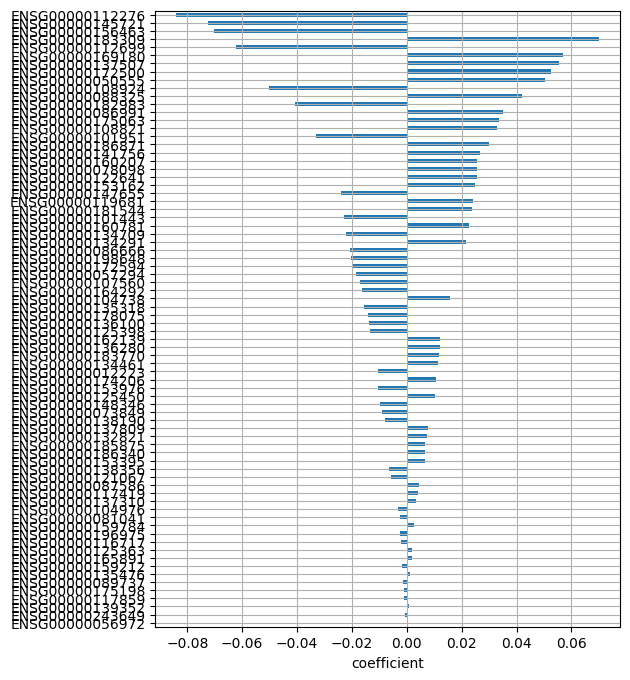

In [32]:
best_model_inter = mp_inter.resampling_cmplt.best_estimator_.named_steps["model"]
best_coefs_inter = pd.DataFrame(best_model_inter.coef_, index=mp_inter.X.columns, columns=["coefficient"])

non_zero_inter = np.sum(best_coefs_inter.iloc[:, 0] != 0)
print(f"Number of non-zero coefficients: {non_zero_inter}")

non_zero_coefs_inter = best_coefs_inter.query("coefficient != 0")
coef_order_inter = non_zero_coefs_inter.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs_inter.loc[coef_order_inter].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

## Overlapping genes

In [65]:
genes_imputed = best_coefs.loc[best_coefs['coefficient'] != 0].index
genes_intersected = best_coefs_inter.loc[best_coefs_inter['coefficient'] != 0].index

overlap_genes = list(set(genes_imputed) & set(genes_imputed))
print(len(overlap_genes))

overlap_genes

74


['ENSG00000160207',
 'ENSG00000088325',
 'ENSG00000153162',
 'ENSG00000135318',
 'ENSG00000050555',
 'ENSG00000186340',
 'ENSG00000117419',
 'ENSG00000105664',
 'ENSG00000073849',
 'ENSG00000145721',
 'ENSG00000162139',
 'ENSG00000132821',
 'ENSG00000137809',
 'ENSG00000181544',
 'ENSG00000136100',
 'ENSG00000107771',
 'ENSG00000125398',
 'ENSG00000081041',
 'ENSG00000148346',
 'ENSG00000159212',
 'ENSG00000112699',
 'ENSG00000104738',
 'ENSG00000175063',
 'ENSG00000183770',
 'ENSG00000136280',
 'ENSG00000164292',
 'ENSG00000112276',
 'ENSG00000087586',
 'ENSG00000156463',
 'ENSG00000108924',
 'ENSG00000185875',
 'ENSG00000196975',
 'ENSG00000078098',
 'ENSG00000212126',
 'ENSG00000137507',
 'ENSG00000039123',
 'ENSG00000086991',
 'ENSG00000122641',
 'ENSG00000057294',
 'ENSG00000119681',
 'ENSG00000153395',
 'ENSG00000178075',
 'ENSG00000147655',
 'ENSG00000165891',
 'ENSG00000182983',
 'ENSG00000101951',
 'ENSG00000086666',
 'ENSG00000104976',
 'ENSG00000134291',
 'ENSG00000160781',
